# Single Spike Classification

### by Katsiaryna Tsishchankava and Anton Krieger

This project aims at automatically classifying signals recorded from neurons in the human brain. This is the first of two Neural networks that is tested within this project. Multiple signals (spikes) form a cluster and are given one of the following labels: 
1. Single-unit (SU)
2. Multi-unit (MU)
3. Artefact (A)

Data from manually labeled clusters is used as input for training and testing a neural network. 

Data was provided by Marcel Kehl and Florian Mormann from the Department of Epileptology, University of Bonn Medical Center.

In [13]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# helper contains various functions, 
# which are used throughout this project
from helper import *

%matplotlib inline
%pylab inline

# The first NN has label NN=1
NN=1

Populating the interactive namespace from numpy and matplotlib


# Training

In [2]:
# load train+dev set
data,data_t1,data_t2,data_t3,data_t4 = load_complete_train_dev_plus_tests(
                                            NN=NN,
                                            load_train_dev=True, 
                                            load_tests=False,
                                            include_fpath=False)

# shuffle train+dev data
data = data.sample(frac=1,random_state=42).reset_index(drop=True)

# view data
data.head()

,unitClass,SpikeShapes_1,SpikeShapes_2,SpikeShapes_3,SpikeShapes_4,SpikeShapes_5,SpikeShapes_6,SpikeShapes_7,SpikeShapes_8,SpikeShapes_9,...,SpikeShapes_55,SpikeShapes_56,SpikeShapes_57,SpikeShapes_58,SpikeShapes_59,SpikeShapes_60,SpikeShapes_61,SpikeShapes_62,SpikeShapes_63,SpikeShapes_64
0,SU,-1.204742,1.549220,1.215783,-0.898331,-1.934252,-0.599483,1.613316,2.333312,1.052675,...,-17.097460,-22.296550,-22.388230,-17.562480,-11.855340,-9.327979,-10.399090,-12.091680,-11.596590,-9.140497
1,A,7.365720,4.462724,5.458118,9.569351,10.434160,2.281757,-12.422450,-22.772860,-19.144810,...,8.444539,9.296791,8.735797,8.025990,6.995722,4.509192,0.733579,-2.398221,-3.018588,-0.985329
2,A,6.679005,-5.006482,-14.926120,-18.983540,-17.057220,-9.838107,0.366259,6.600719,-0.390172,...,-9.020328,-5.834366,-2.385025,-1.082259,-2.566218,-4.809281,-5.950414,-7.200573,-10.428990,-13.549560
3,MU,-4.682205,-6.131558,-6.980803,-7.068803,-6.965700,-6.921285,-6.352767,-4.705916,-2.383957,...,-1.512981,2.025443,6.708276,10.459590,12.450920,12.833050,11.710570,9.230291,6.433362,4.943687
4,A,-6.644780,-0.817086,4.504459,5.419301,0.257854,-7.545219,-11.550520,-7.972876,1.138658,...,0.121468,6.151356,5.882440,-0.878570,-8.432468,-10.820200,-7.808292,-4.169994,-4.080993,-7.592833


In [3]:
# extract input x, labels y, and the standard
# deviation form the train+dev data 
x_tot,y_tot,x_tot_std = read_input(data,NN)

print(f"This is the standard deviation: {x_tot_std}")

# delete memory consuming dataFrame data
del data

# the train+dev set is split with 98% used for training
train_ratio = 0.98
m_train = int(x_tot.shape[0]*train_ratio)

x_train, y_train = x_tot[:m_train], y_tot[:m_train]
x_test, y_test = x_tot[m_train:], y_tot[m_train:]

This is the standard deviation: 30.22505251612303


In [4]:
# define function for initializing the model
def create_model(learning_rate=0.001):
    """ Creates the model and compiles it. """
    
    # set seeds to make outcome reproducible
    np.random.seed(42)
    tf.random.set_seed(1234)
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(3, activation=tf.nn.softmax)
    ])

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer_fn = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer_fn,
                  loss=loss_fn,
                  metrics=['accuracy'])
    
    return model


In [14]:
# initialize the model
model = create_model()

# train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), validation_steps=1, batch_size=32)

# evaluate model
model.evaluate(x_test,  y_test, verbose=2)

# save model manually
model.save_weights('./checkpoints/NN1_model_10epochs')

2022-01-27 19:03:22.026504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3507755776 exceeds 10% of free system memory.


Epoch 1/10
428193/428193 [==============================] - 854s 2ms/step - loss: 0.7508 - accuracy: 0.7941 - val_loss: 0.6415 - val_accuracy: 0.8750
Epoch 2/10
428193/428193 [==============================] - 857s 2ms/step - loss: 0.7470 - accuracy: 0.7981 - val_loss: 0.6229 - val_accuracy: 0.9375
Epoch 3/10
428193/428193 [==============================] - 798s 2ms/step - loss: 0.7463 - accuracy: 0.7989 - val_loss: 0.6068 - val_accuracy: 0.9375
Epoch 4/10
428193/428193 [==============================] - 798s 2ms/step - loss: 0.7459 - accuracy: 0.7994 - val_loss: 0.6085 - val_accuracy: 0.9375
Epoch 5/10
428193/428193 [==============================] - 794s 2ms/step - loss: 0.7458 - accuracy: 0.7996 - val_loss: 0.6050 - val_accuracy: 0.9688
Epoch 6/10
428193/428193 [==============================] - 794s 2ms/step - loss: 0.7457 - accuracy: 0.7997 - val_loss: 0.6148 - val_accuracy: 0.9062
Epoch 7/10
428193/428193 [==============================] - 793s 2ms/step - loss: 0.7458 - accuracy:

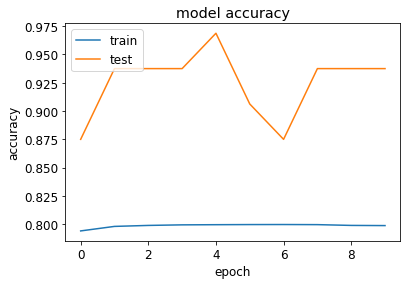

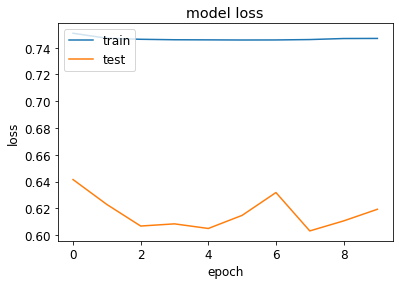

In [15]:
plt_history(history)

The upper plot shows a peak in accuracy and a minimum in loss at "epoch=4", which corresponds to the 5th epoch. Therefore, we re-train the neural network using 5 epochs.

In [5]:
# initialize the model
model = create_model()

# train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,y_test), validation_steps=1, batch_size=32)

# evaluate model
model.evaluate(x_test,  y_test, verbose=2)

# save model manually
model.save_weights('./checkpoints/NN1_model_5epochs')

2022-01-28 10:10:21.453373: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/akrieger/polaris/CCfits/.libs/:/home/akrieger/polaris/cfitsio:/home/akrieger/polaris/CCfits/.libs/:/home/akrieger/polaris/cfitsio::/home/akrieger/Dokumente/cfitsio:/home/akrieger/lib:/home/akrieger/.openmpi/lib/
2022-01-28 10:10:21.473157: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-28 10:10:21.475819: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dwarf35): /proc/driver/nvidia/version does not exist
2022-01-28 10:10:30.436036: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3507755776 exceeds 10% of free system memory.


Epoch 1/5
428193/428193 [==============================] - 805s 2ms/step - loss: 0.7508 - accuracy: 0.7941 - val_loss: 0.6415 - val_accuracy: 0.8750
Epoch 2/5
428193/428193 [==============================] - 815s 2ms/step - loss: 0.7470 - accuracy: 0.7981 - val_loss: 0.6229 - val_accuracy: 0.9375
Epoch 3/5
428193/428193 [==============================] - 1198s 3ms/step - loss: 0.7463 - accuracy: 0.7989 - val_loss: 0.6068 - val_accuracy: 0.9375
Epoch 4/5
428193/428193 [==============================] - 1756s 4ms/step - loss: 0.7459 - accuracy: 0.7994 - val_loss: 0.6085 - val_accuracy: 0.9375
Epoch 5/5
428193/428193 [==============================] - 1207s 3ms/step - loss: 0.7458 - accuracy: 0.7996 - val_loss: 0.6050 - val_accuracy: 0.9688
8739/8739 - 9s - loss: 0.7456 - accuracy: 0.8002 - 9s/epoch - 976us/step


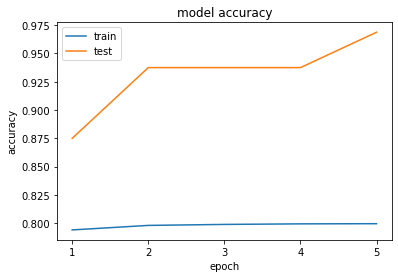

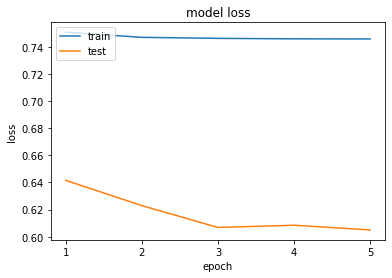

In [11]:
# plot history
plt_history(history)

# Testing

Next we load test sets and evaluate their performance.

In [15]:
# load test sets
data,data_t1,data_t2,data_t3,data_t4 = load_complete_train_dev_plus_tests(
                                            NN=NN,
                                            load_train_dev=False, 
                                            load_tests=True,
                                            include_fpath=False)

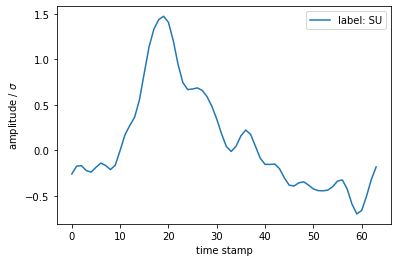

In [16]:
# result from train+dev set
x_tot_std=30.22505251612303

# normalize test input with standard deviation form training
# and define input x and labels y for the test sets
x_t1, y_t1 = read_input(data_t1,NN,is_test=True,x_tot_std=x_tot_std)
x_t2, y_t2 = read_input(data_t2,NN,is_test=True,x_tot_std=x_tot_std)
x_t3, y_t3 = read_input(data_t3,NN,is_test=True,x_tot_std=x_tot_std)
x_t4, y_t4 = read_input(data_t4,NN,is_test=True,x_tot_std=x_tot_std)

# here is en example for how the input data can look like
i=145
plt.figure()
plt.plot(x_t1[i],label="label: "+get_label_from_number(y_t1[i]))
plt.xlabel("time stamp")
plt.ylabel(r"amplitude / $\sigma$")
plt.legend()
plt.show()

In [17]:
# initialize the model
model = create_model()

# load model
model.load_weights('./checkpoints/NN1_model_5epochs')

Next we calculate the accuracy for predictions of every label as well as the F1-score. 
Furthermore, we use two different confusion matrices. The first confusion matrix (Single Spike) evaluates the performance of predicting the correct label on the basis of a single spike. The second confusion matrix  (Complete Cluster) compares all predictions of spikes that form a cluster and assigns all these spikes the same label, which is the one that appears the most often. 

Single Signal Prediction:
17456/17456 - 19s - loss: 0.7553 - accuracy: 0.7896 - 19s/epoch - 1ms/step
17456/17456 - 14s - 14s/epoch - 788us/step
F1-score (single): 0.7855677883939058
Cluster Prediction:
Cluster Accuracy =  0.825
F1-score (cluster): 0.8713678647383966


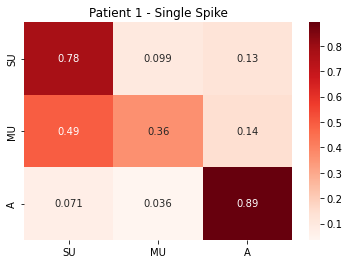

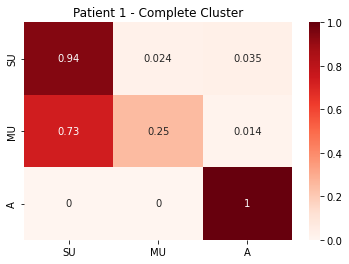

In [20]:
# run testing set 1
test_single_cluster(model,data_t1,x_t1,y_t1,1,save_figure=True,NN=1)

Single Signal Prediction:
15886/15886 - 17s - loss: 0.7929 - accuracy: 0.7485 - 17s/epoch - 1ms/step
15886/15886 - 12s - 12s/epoch - 776us/step
F1-score (single): 0.7347454361848459
Cluster Prediction:
Cluster Accuracy =  0.8599033816425121
F1-score (cluster): 0.8518190361103715


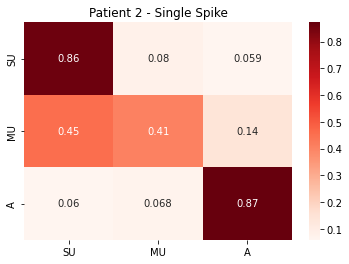

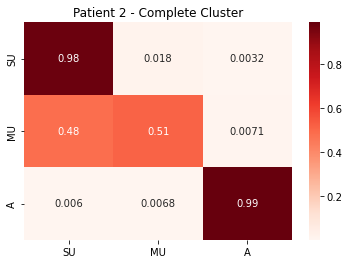

In [21]:
# run testing set 2
test_single_cluster(model,data_t2,x_t2,y_t2,2,save_figure=True,NN=1)

Single Signal Prediction:
14450/14450 - 16s - loss: 0.7936 - accuracy: 0.7486 - 16s/epoch - 1ms/step
14450/14450 - 10s - 10s/epoch - 719us/step
F1-score (single): 0.7469321946527044
Cluster Prediction:
Cluster Accuracy =  0.8631578947368421
F1-score (cluster): 0.8851814264210353


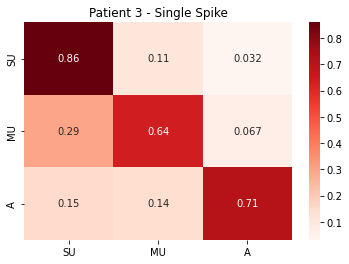

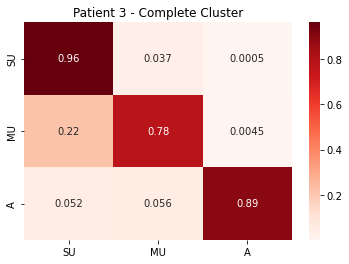

In [22]:
# run testing set 3
test_single_cluster(model,data_t3,x_t3,y_t3,3,save_figure=True,NN=1)

Single Signal Prediction:
16913/16913 - 18s - loss: 0.7706 - accuracy: 0.7739 - 18s/epoch - 1ms/step
16913/16913 - 13s - 13s/epoch - 762us/step
F1-score (single): 0.7712596505336606
Cluster Prediction:
Cluster Accuracy =  0.8731707317073171
F1-score (cluster): 0.9174952231116738


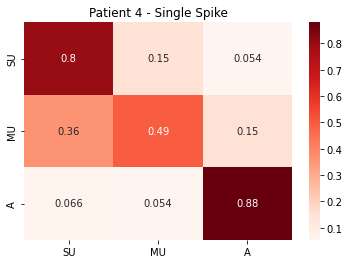

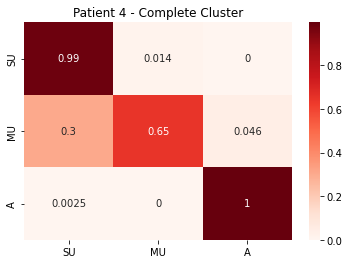

In [23]:
# run testing set 4
test_single_cluster(model,data_t4,x_t4,y_t4,4,save_figure=True,NN=1)